In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv("TMNIST_Data.csv", header=0)
df

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
print("Shape of the dataset:", df.shape)

print("Column names:", df.columns)

print("Number of unique labels:", df['labels'].nunique())

print("Unique labels:")
df.labels.value_counts()

Shape of the dataset: (29900, 786)
Column names: Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)
Number of unique labels: 10
Unique labels:


labels
2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: count, dtype: int64

In [38]:
X = df.drop(columns = {'names', 'labels'}, axis=1)
y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [39]:
print(X_train.shape, y_train.shape)

(23920, 784) (23920,)


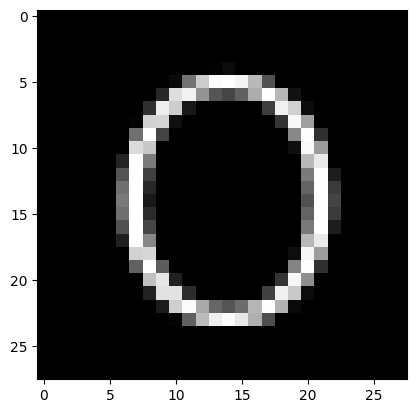

In [40]:
sample_image = X_train.iloc[1].values.reshape(28, 28)

plt.imshow(sample_image, cmap='gray')
plt.show()

In [42]:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

d:\Repos\Sudoku-Solver\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8770 - loss: 0.5167 - val_accuracy: 0.9653 - val_loss: 0.1263
Epoch 2/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.1137 - val_accuracy: 0.9714 - val_loss: 0.1061
Epoch 3/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0861 - val_accuracy: 0.9739 - val_loss: 0.0953
Epoch 4/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0725 - val_accuracy: 0.9762 - val_loss: 0.0921
Epoch 5/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0589 - val_accuracy: 0.9766 - val_loss: 0.0877
Epoch 6/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0435 - val_accuracy: 0.9772 - val_loss: 0.0877
Epoch 7/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0449 - val_accuracy: 0.9795 - val_loss: 0.0817
Epoch 8/10
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0311 - val_accuracy: 0.

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9791 - loss: 0.0897
Test accuracy: 0.9799330830574036


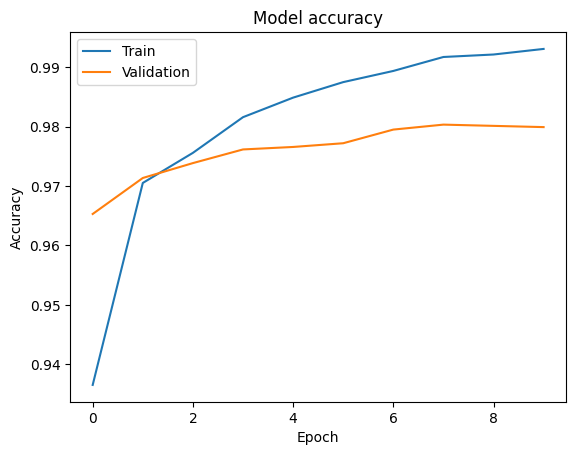

Text(0.5, 1.0, 'Model loss')

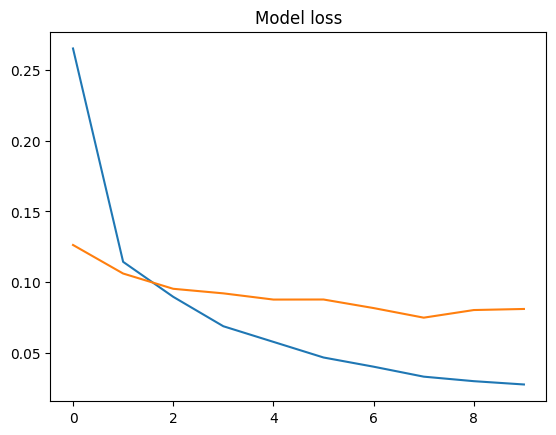

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')

187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


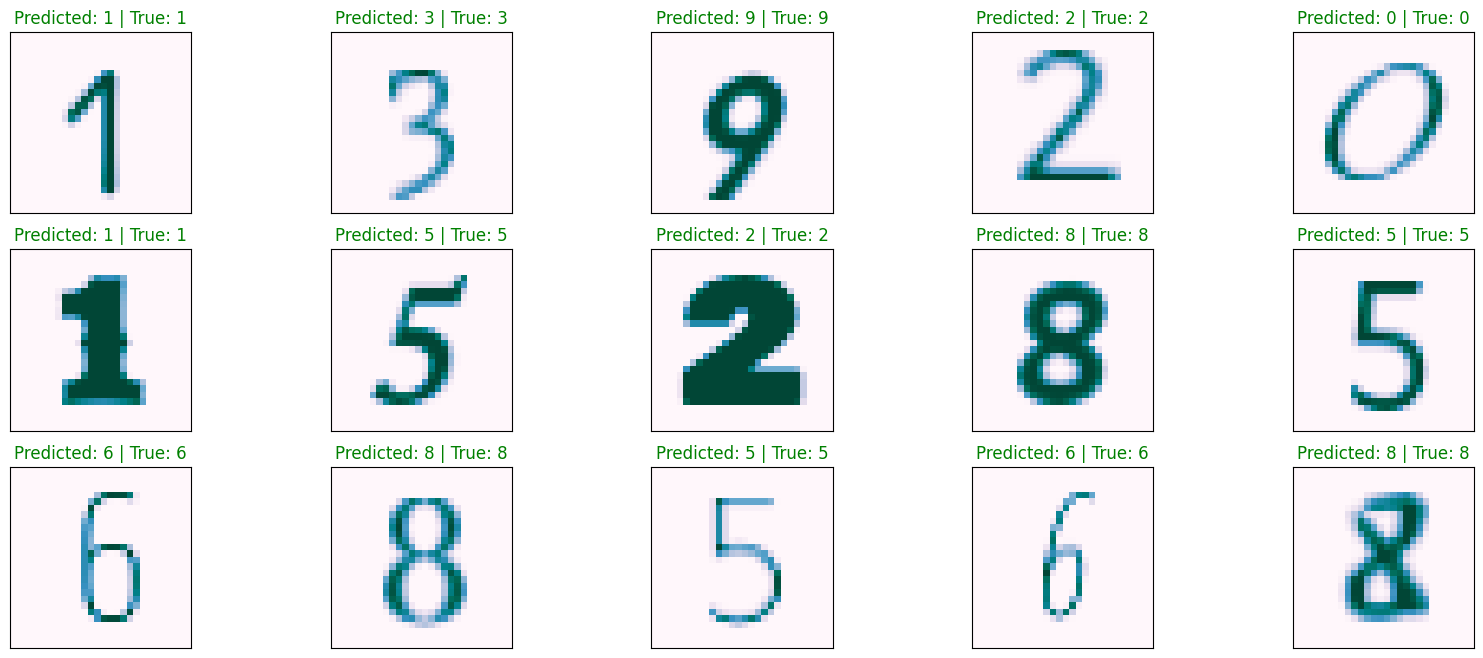

In [48]:
y_pred = model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.reshape(X_test.iloc[index].values, (28, 28)), cmap='PuBuGn')
    pred_label = np.argmax(y_pred[index])
    true_label = y_test.iloc[index]
    ax.set_title("Predicted: {} | True: {}".format(pred_label, true_label),color=("green" if pred_label == true_label else "red"))

In [24]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")
print("Saved model to disk")

Saved model to disk
